In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <p style='text-align: center; text-decoration: underline; color: purple'>Analytics</p>

In [2]:
df = pd.read_csv('df_fit.csv')
df.head()

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
0,81051628,1880.0,165.0,diesel,1.968,6.3
1,75951987,1505.0,150.0,petrol,1.499,6.6
2,80674470,1461.0,144.0,petrol,1.199,6.4
3,50499549,1380.0,138.0,petrol,1.498,6.1
4,75923176,1197.0,140.0,petrol,0.999,6.2


In [3]:
print(df.shape)
df.describe()

(2500000, 6)


,ID,Mass_(kg),CO2_emission_(g/km),Engine_size,Fuel_consumption_(l/100km)
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,6.425808e+07,1.520121e+03,1.530162e+02,1.634332e+00,6.514457e+00
std,2.094027e+07,2.994425e+02,3.095134e+01,6.061404e-01,1.237032e+00
min,8.000000e+00,9.450000e+02,4.400000e+01,8.750000e-01,5.500000e+00
25%,5.184605e+07,1.295000e+03,1.330000e+02,1.199000e+00,5.800000e+00
50%,7.479526e+07,1.441000e+03,1.440000e+02,1.498000e+00,6.200000e+00
75%,8.087097e+07,1.680000e+03,1.600000e+02,1.984000e+00,6.800000e+00
max,1.496951e+08,2.996000e+03,5.430000e+02,7.993000e+00,2.410000e+01


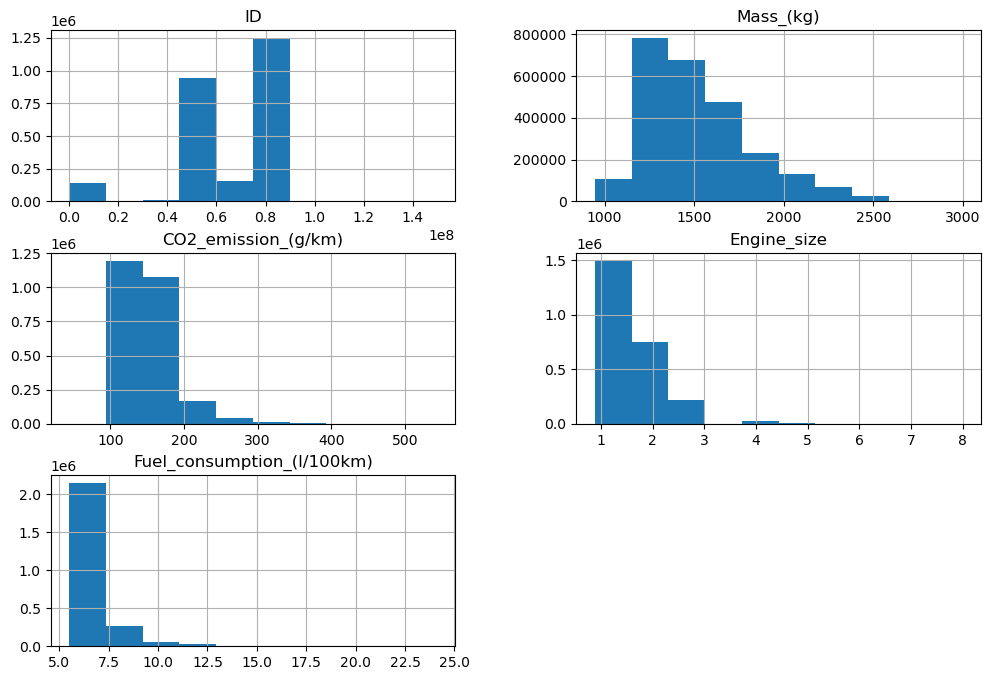

In [4]:
df.hist(figsize=(12, 8))
plt.show()

In [5]:
df1 = df[(df['Mass_(kg)'] >= 900) & (df['Mass_(kg)'] <= 3000)]
df1.head()

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
0,81051628,1880.0,165.0,diesel,1.968,6.3
1,75951987,1505.0,150.0,petrol,1.499,6.6
2,80674470,1461.0,144.0,petrol,1.199,6.4
3,50499549,1380.0,138.0,petrol,1.498,6.1
4,75923176,1197.0,140.0,petrol,0.999,6.2


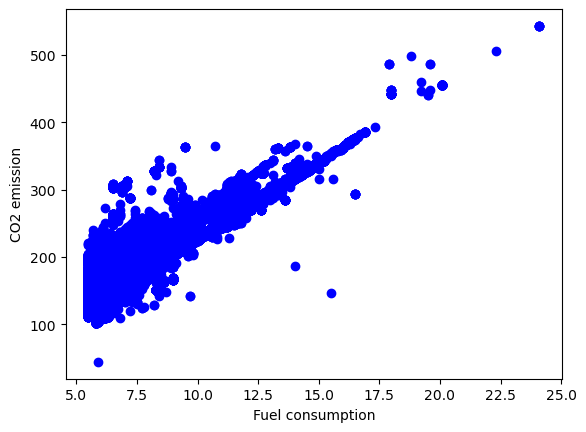

In [6]:
plt.scatter(df['Fuel_consumption_(l/100km)'], df['CO2_emission_(g/km)'], color='blue')
plt.xlabel('Fuel consumption')
plt.ylabel('CO2 emission')
plt.show()

In [7]:
df.sort_values('CO2_emission_(g/km)')

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
1125964,56396998,1495.0,44.0,petrol,1.332,5.9
256916,851259,1300.0,102.0,petrol,1.498,5.8
914706,883118,1300.0,102.0,petrol,1.498,5.8
1083097,888917,1300.0,102.0,petrol,1.498,5.8
854253,70042,1300.0,102.0,petrol,1.498,5.8
...,...,...,...,...,...,...
1836431,78547567,1435.0,543.0,petrol,6.499,24.1
157684,79948999,1435.0,543.0,petrol,6.499,24.1
1861484,79948997,1435.0,543.0,petrol,6.499,24.1
2366589,79948996,1435.0,543.0,petrol,6.499,24.1


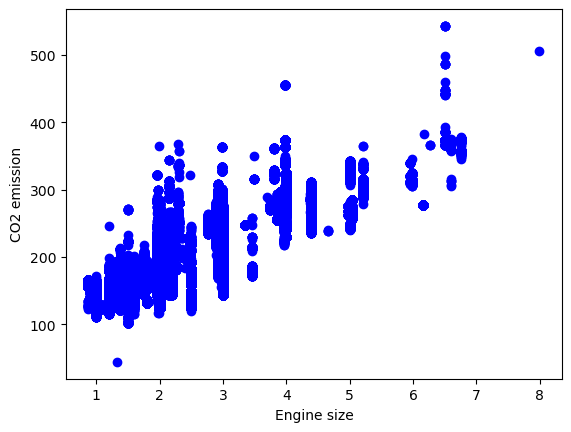

In [8]:
plt.scatter(df['Engine_size'], df['CO2_emission_(g/km)'], color='blue')
plt.xlabel('Engine size')
plt.ylabel('CO2 emission')
plt.show()

---

## Modelo de regresion lineal

### Entrenamiento

In [9]:
msk = np.random.rand(len(df)) < 0.8 #msk = mask. Lista de len(df) numeros aleatorios entre el 0 y 1. aproximadamente el 80% del conjunto (<0.8)
train = df[msk]
test = df[~msk]

In [10]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_size']])
train_y = np.asanyarray(train[['CO2_emission_(g/km)']])
regr.fit(train_x, train_y)

#Coeficientes
print('Pendiente:', regr.coef_)
print('Interseccion', regr.intercept_)

Pendiente: [[38.72680351]]
Interseccion [89.73106494]


##### Graficamos el resultado

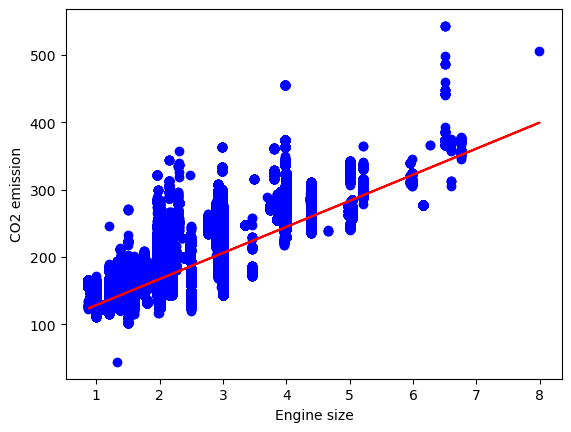

In [11]:
plt.scatter(train['Engine_size'], train['CO2_emission_(g/km)'], color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine size')
plt.ylabel('CO2 emission')
plt.show()

### Testeo

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

test_x = np.asanyarray(test[['Engine_size']])
test_y = np.asanyarray(test[['CO2_emission_(g/km)']])
test_y_ = regr.predict(test_x)

print('Error medio absoluto: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Residual de la suma de los cuadrados (MSE): %0.2f' % np.mean((test_y_ - test_y)**2))
print('R2-score: %0.2f' % r2_score(test_y, test_y_))

Error medio absoluto: 13.87
Residual de la suma de los cuadrados (MSE): 406.34
R2-score: 0.57


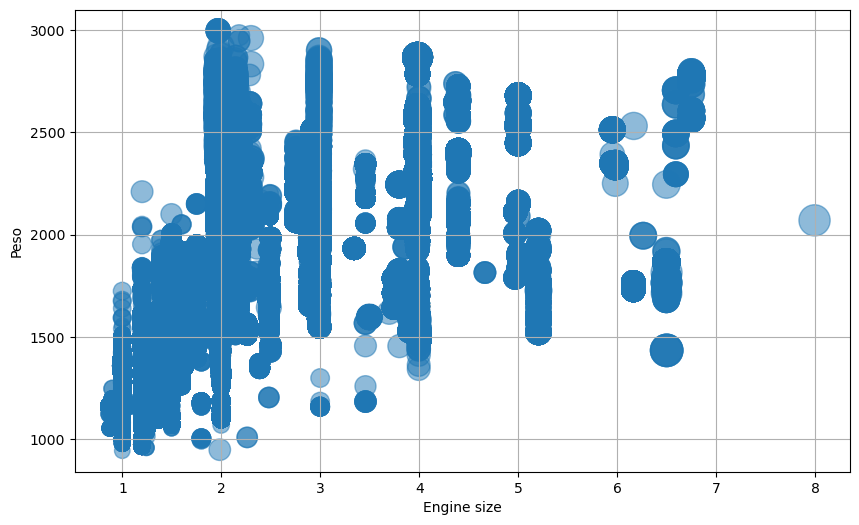

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Engine_size'], df['Mass_(kg)'], s=df['CO2_emission_(g/km)'], alpha=0.5)
plt.xlabel('Engine size')
plt.ylabel('Peso')
plt.grid(True)
plt.show()

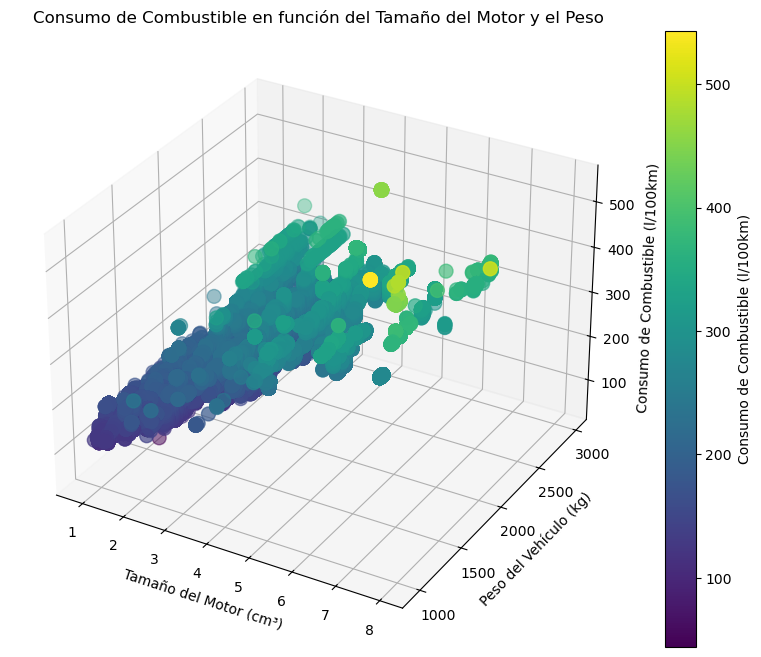

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['Engine_size']
y = df['Mass_(kg)']
z = df['CO2_emission_(g/km)']

scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=100)
ax.set_xlabel('Tamaño del Motor (cm³)')
ax.set_ylabel('Peso del Vehículo (kg)')
ax.set_zlabel('Consumo de Combustible (l/100km)')
ax.set_title('Consumo de Combustible en función del Tamaño del Motor y el Peso')

plt.colorbar(scatter, label='Consumo de Combustible (l/100km)')

plt.show()

---
---
---
---
---

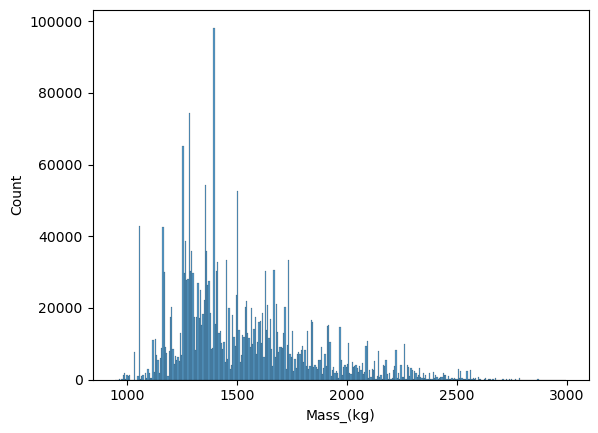

In [15]:
sns.histplot(df['Mass_(kg)'])
plt.show()

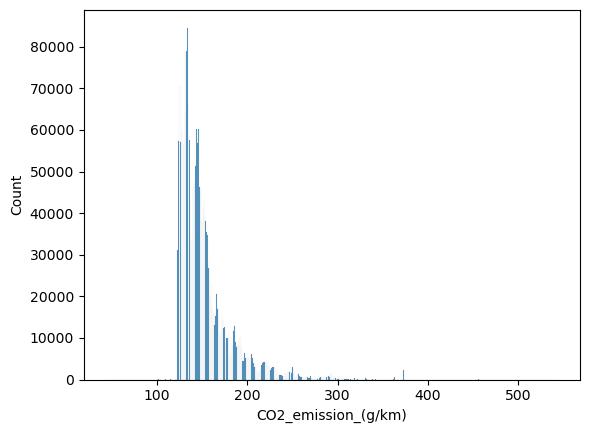

In [16]:
sns.histplot(df['CO2_emission_(g/km)'])
plt.show()

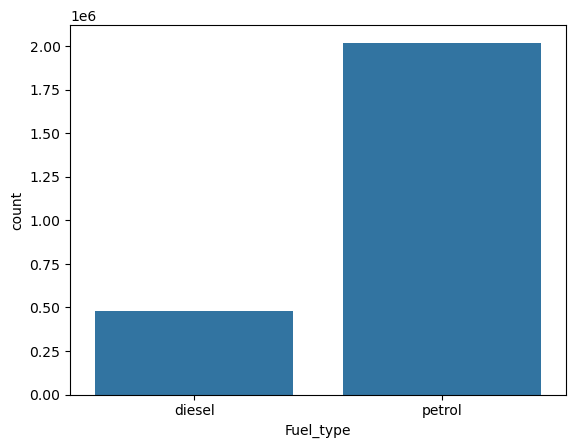

In [17]:
sns.countplot(x='Fuel_type', data=df)
plt.show()

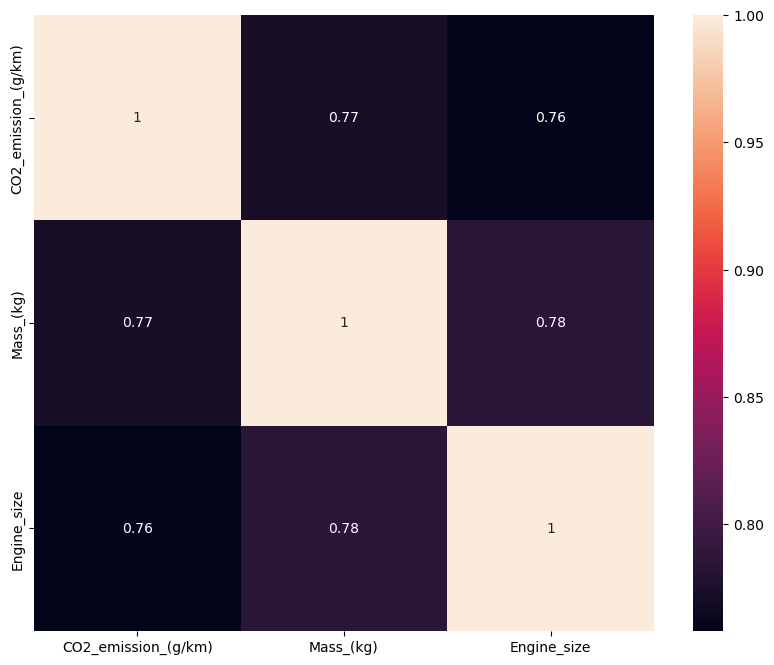

In [18]:
# Calcular la matriz de correlación
correlation_matrix = df[['CO2_emission_(g/km)', 'Mass_(kg)', 'Engine_size']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [19]:
df2 = pd.get_dummies(df, columns=['Fuel_type'], drop_first=True)

from sklearn.model_selection import train_test_split
x = df2.drop('CO2_emission_(g/km)', axis=1)
y = df2['CO2_emission_(g/km)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Squared Error:  26.48318600028607
R2 Score:  0.9722972080427985


In [21]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Squared Error:  1.5865236750226759
R2 Score:  0.9983404136003934
